# Exploring the Framingham Dataset: Building a Clinical Cardiovascular Disease (CVD) System


Welcome to this Jupyter Notebook, where we will explore the Framingham dataset to develop a predictive model for Cardiovascular Disease (CVD). Our goal is to build a reliable CVD system that can be used in clinical settings for early intervention and personalised care.

We will begin by exploring the Framingham dataset, analysing its features and identifying any data quality issues. Next, we will apply data cleansing techniques to ensure the accuracy of our model.

After preparing the dataset, we will develop a predictive model using machine learning algorithms. We will evaluate different models and tune their parameters to create a practical CVD system.

By the end of this notebook, we aim to provide healthcare professionals with a valuable tool to identify individuals at high risk of developing CVD. Let's start our data-driven journey towards better cardiovascular healthcare.

## Exploratory Data Analysis 

In [1]:
#Importing all required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("frmgham2.csv")

In [4]:
df.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.0,52,121.0,66.0,0,0.0,NaN,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,6238,2,260.0,52,105.0,69.5,0,0.0,29.43,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEX       11627 non-null  int64  
 2   TOTCHOL   11218 non-null  float64
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   CURSMOKE  11627 non-null  int64  
 7   CIGPDAY   11548 non-null  float64
 8   BMI       11575 non-null  float64
 9   DIABETES  11627 non-null  int64  
 10  BPMEDS    11034 non-null  float64
 11  HEARTRTE  11621 non-null  float64
 12  GLUCOSE   10187 non-null  float64
 13  educ      11332 non-null  float64
 14  PREVCHD   11627 non-null  int64  
 15  PREVAP    11627 non-null  int64  
 16  PREVMI    11627 non-null  int64  
 17  PREVSTRK  11627 non-null  int64  
 18  PREVHYP   11627 non-null  int64  
 19  TIME      11627 non-null  int64  
 20  PERIOD    11627 non-null  in

In [6]:
df.shape

(11627, 39)

In [7]:
df.describe()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
count,1.162700e+04,11627.000000,11218.000000,11627.000000,11627.000000,11627.000000,11627.000000,11548.000000,11575.000000,11627.000000,...,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000
mean,5.004741e+06,1.568074,241.162418,54.792810,136.324116,83.037757,0.432528,8.250346,25.877349,0.045584,...,0.249333,0.743270,7241.556893,7593.846736,7543.036725,7008.153608,7660.880021,7166.082996,7854.102950,3598.956395
std,2.900877e+06,0.495366,45.368030,9.564299,22.798625,11.660144,0.495448,12.186888,4.102640,0.208589,...,0.432646,0.436848,2477.780010,2136.730285,2192.120311,2641.344513,2011.077091,2541.668477,1788.369623,3464.164659
min,2.448000e+03,1.000000,107.000000,32.000000,83.500000,30.000000,0.000000,0.000000,14.430000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000
25%,2.474378e+06,1.000000,210.000000,48.000000,120.000000,75.000000,0.000000,0.000000,23.095000,0.000000,...,0.000000,0.000000,6224.000000,7212.000000,7049.500000,5598.500000,7295.000000,6004.000000,7797.500000,0.000000
50%,5.006008e+06,2.000000,238.000000,54.000000,132.000000,82.000000,0.000000,0.000000,25.480000,0.000000,...,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,2429.000000
75%,7.472730e+06,2.000000,268.000000,62.000000,149.000000,90.000000,1.000000,20.000000,28.070000,0.000000,...,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,7329.000000
max,9.999312e+06,2.000000,696.000000,81.000000,295.000000,150.000000,1.000000,90.000000,56.800000,1.000000,...,1.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000


In [8]:
df = df.fillna(df.mean())

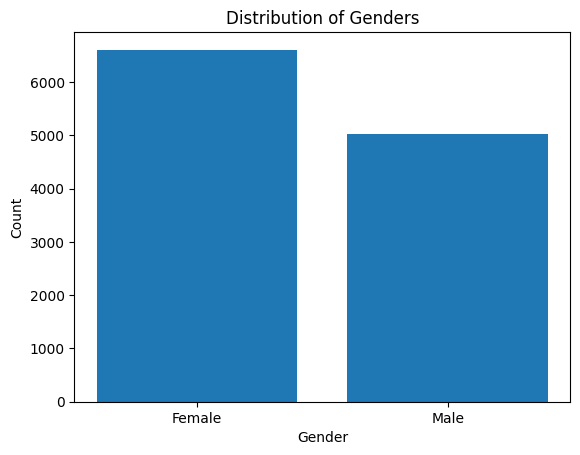

In [9]:
# Map the numerical values to corresponding genders
gender_map = {1: 'Male', 2: 'Female'}
df['SEX'] = df['SEX'].map(gender_map)

# Count the number of occurrences for each gender
gender_counts = df['SEX'].value_counts()

# Plot the distribution of genders
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Genders')
plt.show()

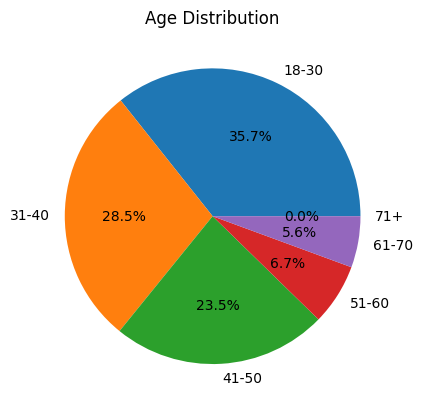

In [10]:
# Filter the 'age' column
age_data = df['AGE'].dropna()

# Define age ranges
age_ranges = ['18-30', '31-40', '41-50', '51-60', '61-70', '71+']

# Categorize ages into age ranges
age_category = pd.cut(age_data, bins=[18, 30, 40, 50, 60, 70, float('inf')], labels=age_ranges)

# Count the number of occurrences for each age range
age_counts = age_category.value_counts()

# Plot the age distribution as a pie chart
plt.pie(age_counts, labels=age_ranges, autopct='%1.1f%%')
plt.title('Age Distribution')
plt.show()

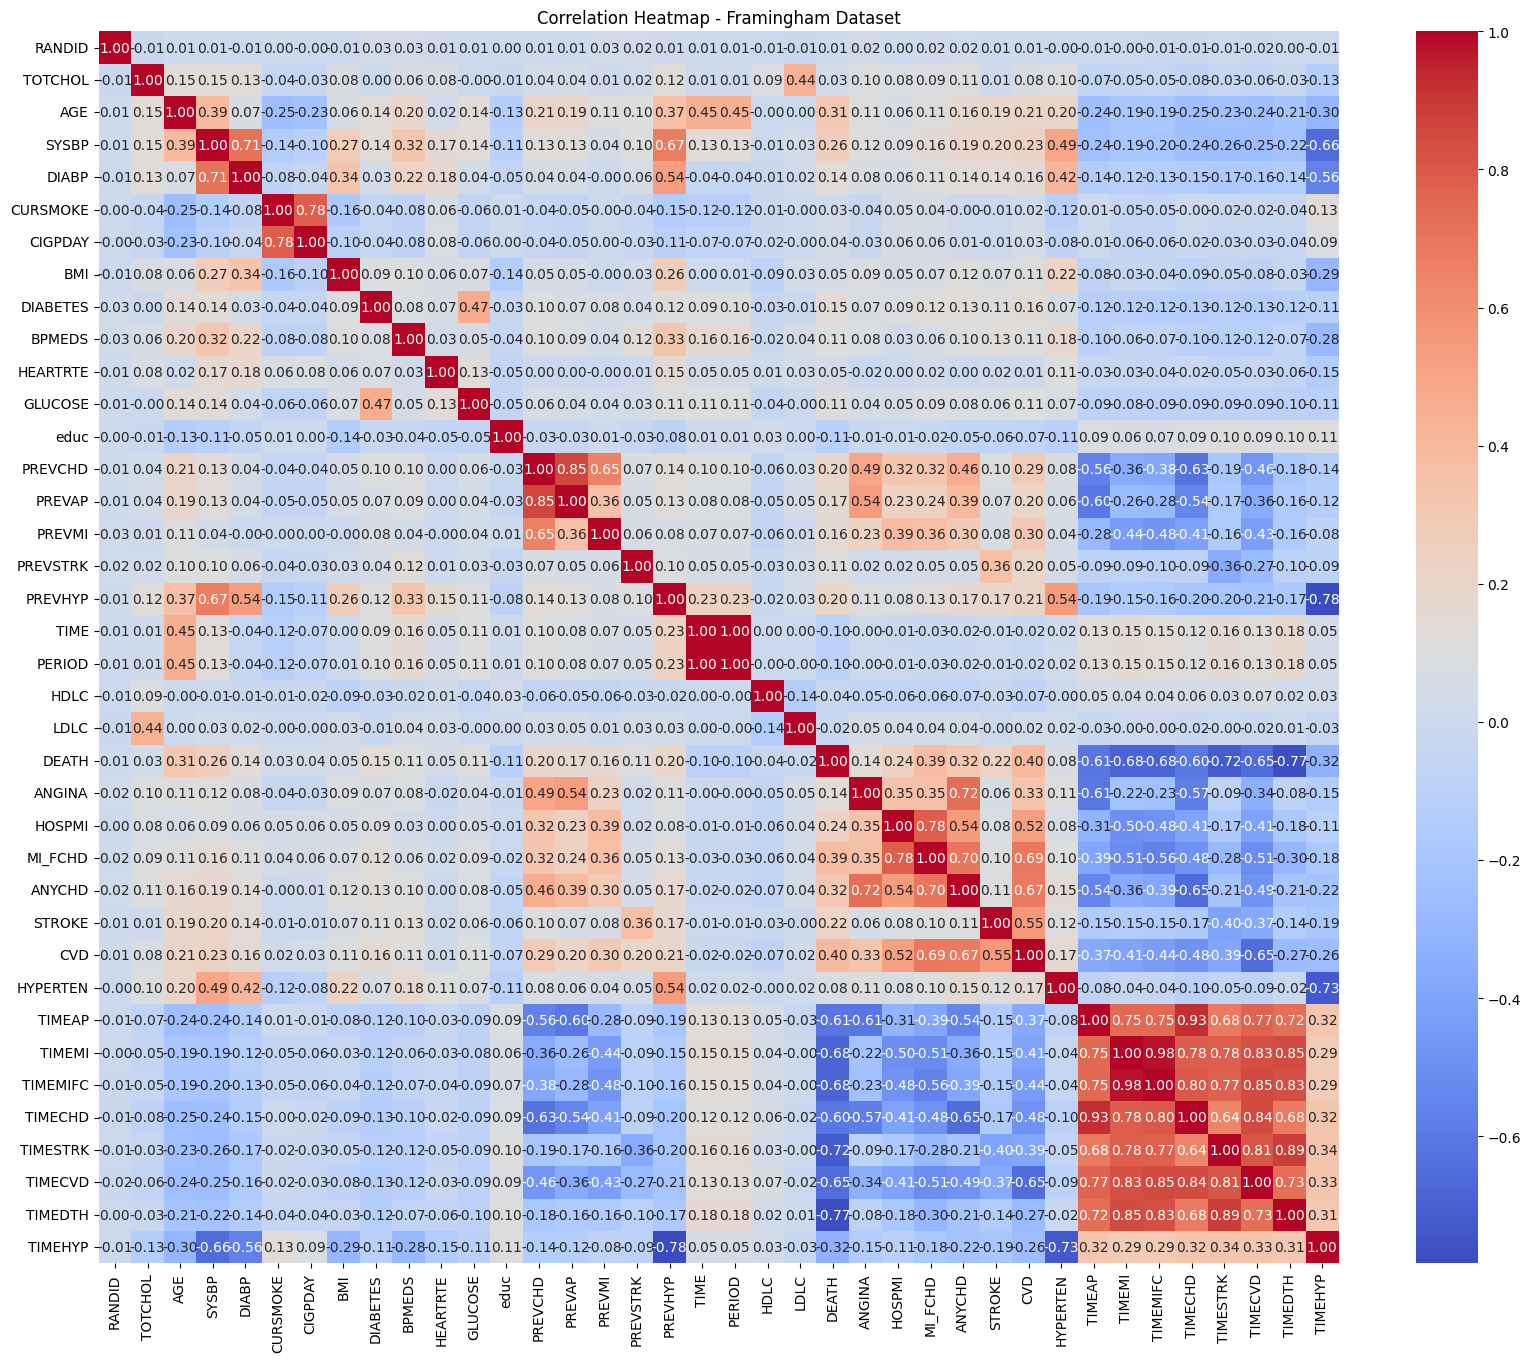

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Filter numeric columns
numeric_columns = df.select_dtypes(include='number')

# Generate a correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Correlation Heatmap - Framingham Dataset')
plt.show()


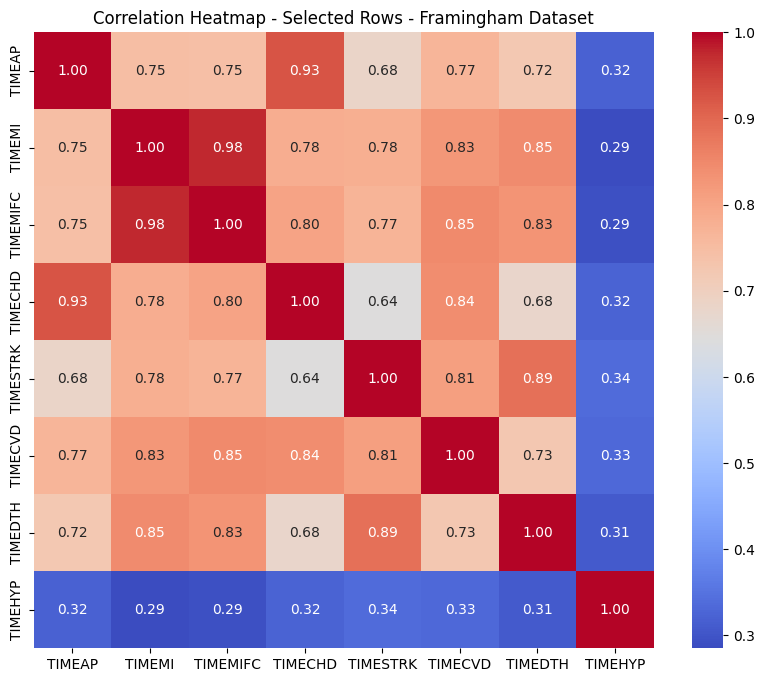

In [12]:
# Select only the specified rows
selected_rows = df.iloc[:, 31:39]

# Generate a correlation matrix for the selected rows
correlation_matrix = selected_rows.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Correlation Heatmap - Selected Rows - Framingham Dataset')
plt.show()

In [13]:
# Drop columns with correlation score greater than 0.84
high_correlation_cols = correlation_matrix[correlation_matrix > 0.84].sum() > 1
df_fil = df.drop(columns=high_correlation_cols[high_correlation_cols].index)

# Display the filtered DataFrame
print(df_fil.head())
df_fil.head()

   RANDID     SEX  TOTCHOL  AGE  SYSBP  DIABP  CURSMOKE  CIGPDAY        BMI   
0    2448    Male    195.0   39  106.0   70.0         0      0.0  26.970000  \
1    2448    Male    209.0   52  121.0   66.0         0      0.0  25.877349   
2    6238  Female    250.0   46  121.0   81.0         0      0.0  28.730000   
3    6238  Female    260.0   52  105.0   69.5         0      0.0  29.430000   
4    6238  Female    237.0   58  108.0   66.0         0      0.0  28.500000   

   DIABETES  ...        LDLC  DEATH  ANGINA  HOSPMI  MI_FCHD  ANYCHD  STROKE   
0         0  ...  176.466953      0       0       1        1       1       0  \
1         0  ...  178.000000      0       0       1        1       1       0   
2         0  ...  176.466953      0       0       0        0       0       0   
3         0  ...  176.466953      0       0       0        0       0       0   
4         0  ...  141.000000      0       0       0        0       0       0   

   CVD  HYPERTEN  TIMEHYP  
0    1         0

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,LDLC,DEATH,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,HYPERTEN,TIMEHYP
0,2448,Male,195.0,39,106.0,70.0,0,0.0,26.970000,0,...,176.466953,0,0,1,1,1,0,1,0,8766
1,2448,Male,209.0,52,121.0,66.0,0,0.0,25.877349,0,...,178.000000,0,0,1,1,1,0,1,0,8766
2,6238,Female,250.0,46,121.0,81.0,0,0.0,28.730000,0,...,176.466953,0,0,0,0,0,0,0,0,8766
3,6238,Female,260.0,52,105.0,69.5,0,0.0,29.430000,0,...,176.466953,0,0,0,0,0,0,0,0,8766
4,6238,Female,237.0,58,108.0,66.0,0,0.0,28.500000,0,...,141.000000,0,0,0,0,0,0,0,0,8766


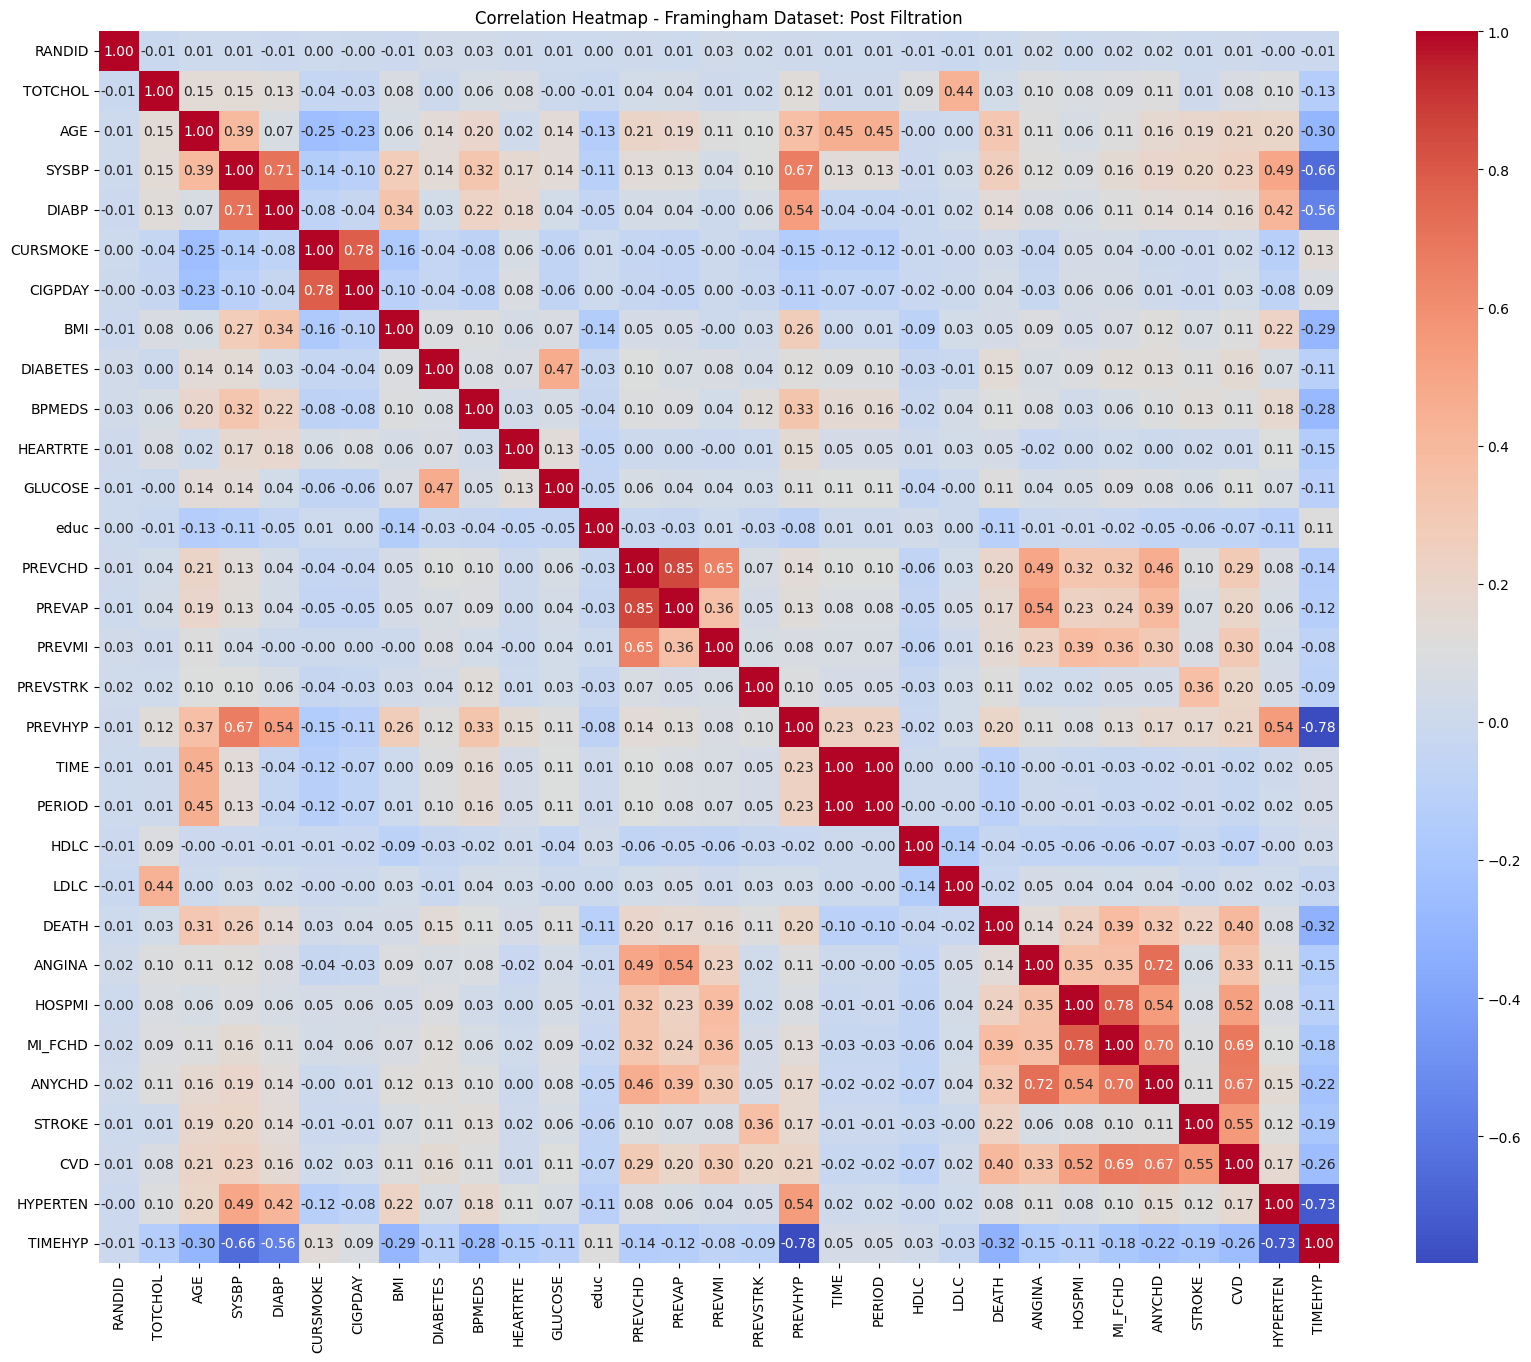

In [ ]:

# Filter numeric columns
numeric_columns2 = df_fil.select_dtypes(include='number')

# Generate a correlation matrix
correlation_matrix = numeric_columns2.corr()

# Create a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Correlation Heatmap - Framingham Dataset: Post Filtration')
plt.show()


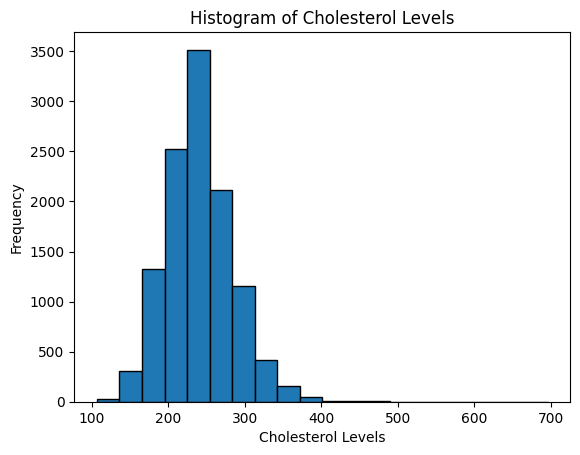

In [15]:
# Filter the 'TOTCHOL' column
cholesterol_levels = df_fil['TOTCHOL']

# Plot the histogram
plt.hist(cholesterol_levels, bins=20, edgecolor='black')
plt.xlabel('Cholesterol Levels')
plt.ylabel('Frequency')
plt.title('Histogram of Cholesterol Levels')
plt.show()

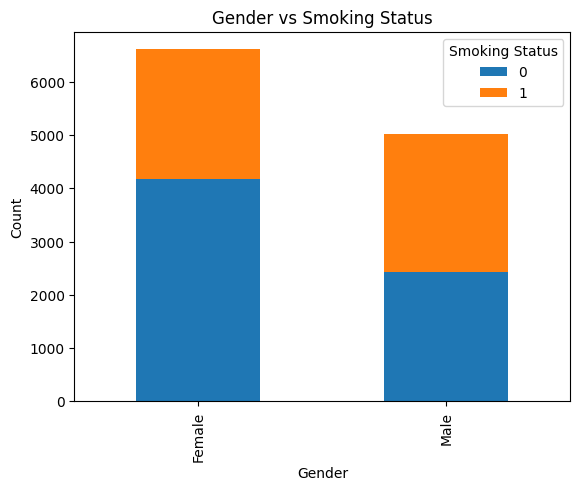

In [16]:

# Bar plot: Gender vs Smoking Status
gender_smoking_counts = df_fil.groupby(['SEX', 'CURSMOKE']).size().unstack()
gender_smoking_counts.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs Smoking Status')
plt.legend(title='Smoking Status')
plt.show()


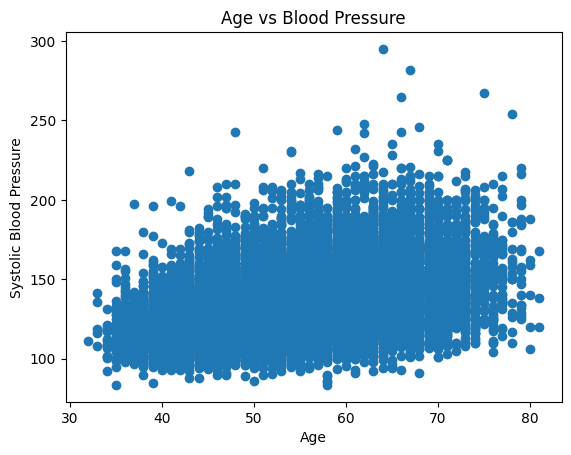

In [17]:

# Scatter plot: Age vs Blood Pressure
age_blood_pressure = df_fil[['AGE', 'SYSBP']]
plt.scatter(age_blood_pressure['AGE'], age_blood_pressure['SYSBP'])
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure')
plt.title('Age vs Blood Pressure')
plt.show()


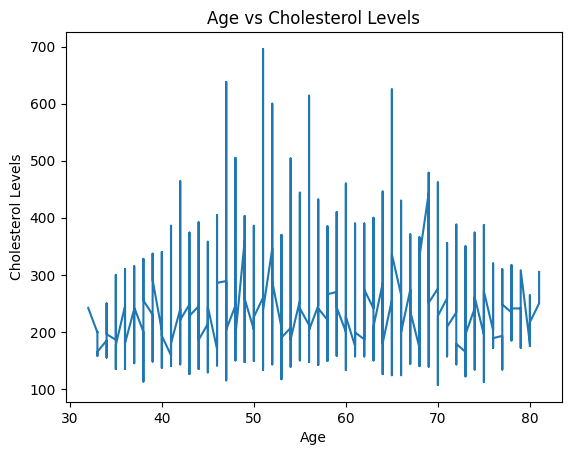

In [18]:
# Extract age and TOTCHOL columns
age_chol = df[['AGE', 'TOTCHOL']]

# Sort the data by age
age_chol = age_chol.sort_values('AGE')

# Create a line plot
plt.plot(age_chol['AGE'], age_chol['TOTCHOL'])
plt.xlabel('Age')
plt.ylabel('Cholesterol Levels')
plt.title('Age vs Cholesterol Levels')
plt.show()




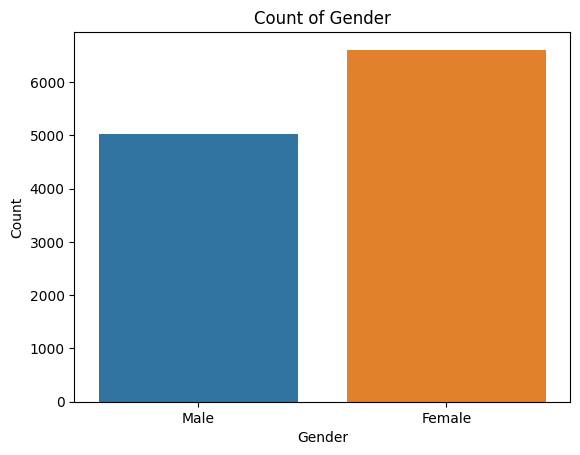

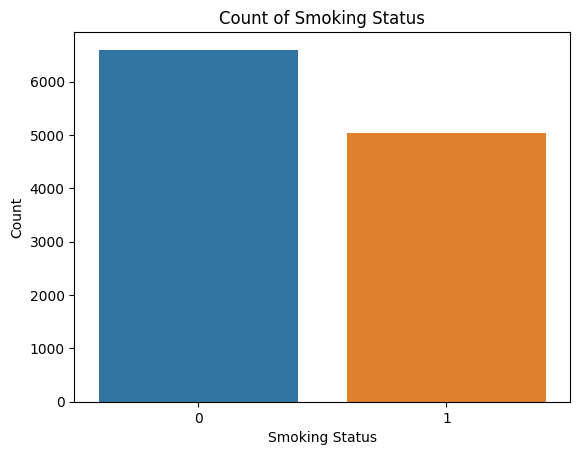

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the Framingham dataset in a DataFrame called 'df'

# Count plot: Gender
sns.countplot(x='SEX', data=df_fil)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Gender')
plt.show()

# Count plot: Smoking Status
sns.countplot(x='CURSMOKE', data=df_fil)
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Count of Smoking Status')
plt.show()


In [20]:
# # Filter the required columns
# df = df[['AGE', 'SYSBP']]

# # Remove rows with missing values
# df = df.dropna()

# # Create age blocks
# df['age_block'] = pd.cut(df['AGE'], bins=range(10, 100, 10), right=False)

# # Create the box plot
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=df, x='age_block', y='SYSBP')
# plt.title('Systolic Blood Pressure by Age Block')
# plt.xlabel('Age Block')
# plt.ylabel('Systolic Blood Pressure')
# plt.xticks(rotation=45)
# plt.show()

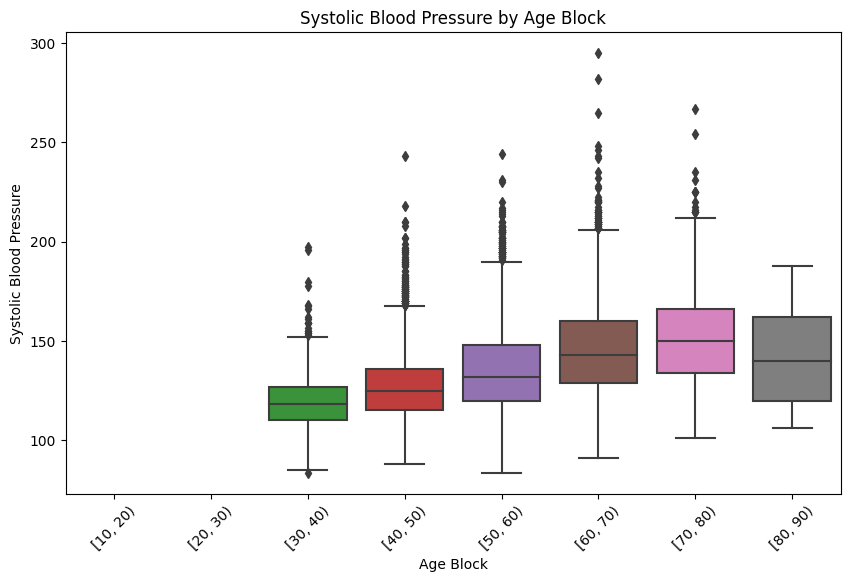

In [22]:
# Filter the required columns
df_agesys = df[['AGE', 'SYSBP']]

# Remove rows with missing values
df_agesys = df_agesys.dropna()

# Create age blocks
df_agesys['age_block'] = pd.cut(df_agesys['AGE'], bins=range(10, 100, 10), right=False)

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_agesys, x='age_block', y='SYSBP')
plt.title('Systolic Blood Pressure by Age Block')
plt.xlabel('Age Block')
plt.ylabel('Systolic Blood Pressure')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.head()

           CIGPDAY     SYSBP       AGE     DIABP  CURSMOKE   TOTCHOL   
CIGPDAY   1.000000 -0.102277 -0.226817 -0.035116  0.778115 -0.032780  \
SYSBP    -0.102277  1.000000  0.389010  0.711641 -0.140761  0.146647   
AGE      -0.226817  0.389010  1.000000  0.069258 -0.252655  0.146633   
DIABP    -0.035116  0.711641  0.069258  1.000000 -0.075925  0.127397   
CURSMOKE  0.778115 -0.140761 -0.252655 -0.075925  1.000000 -0.040941   
TOTCHOL  -0.032780  0.146647  0.146633  0.127397 -0.040941  1.000000   
HDLC     -0.021278 -0.005914 -0.004744 -0.010831 -0.011421  0.089846   
LDLC     -0.002828  0.032140  0.004630  0.020640 -0.003924  0.436349   
BMI      -0.102205  0.274063  0.060064  0.336656 -0.164884  0.077977   
GLUCOSE  -0.060634  0.142457  0.141612  0.035420 -0.060385 -0.001955   
DIABETES -0.040579  0.144683  0.137484  0.031810 -0.043479  0.003206   
PREVAP   -0.045633  0.127068  0.193413  0.043511 -0.048570  0.044352   
PREVCHD  -0.035959  0.133859  0.210838  0.040876 -0.043664  0.03

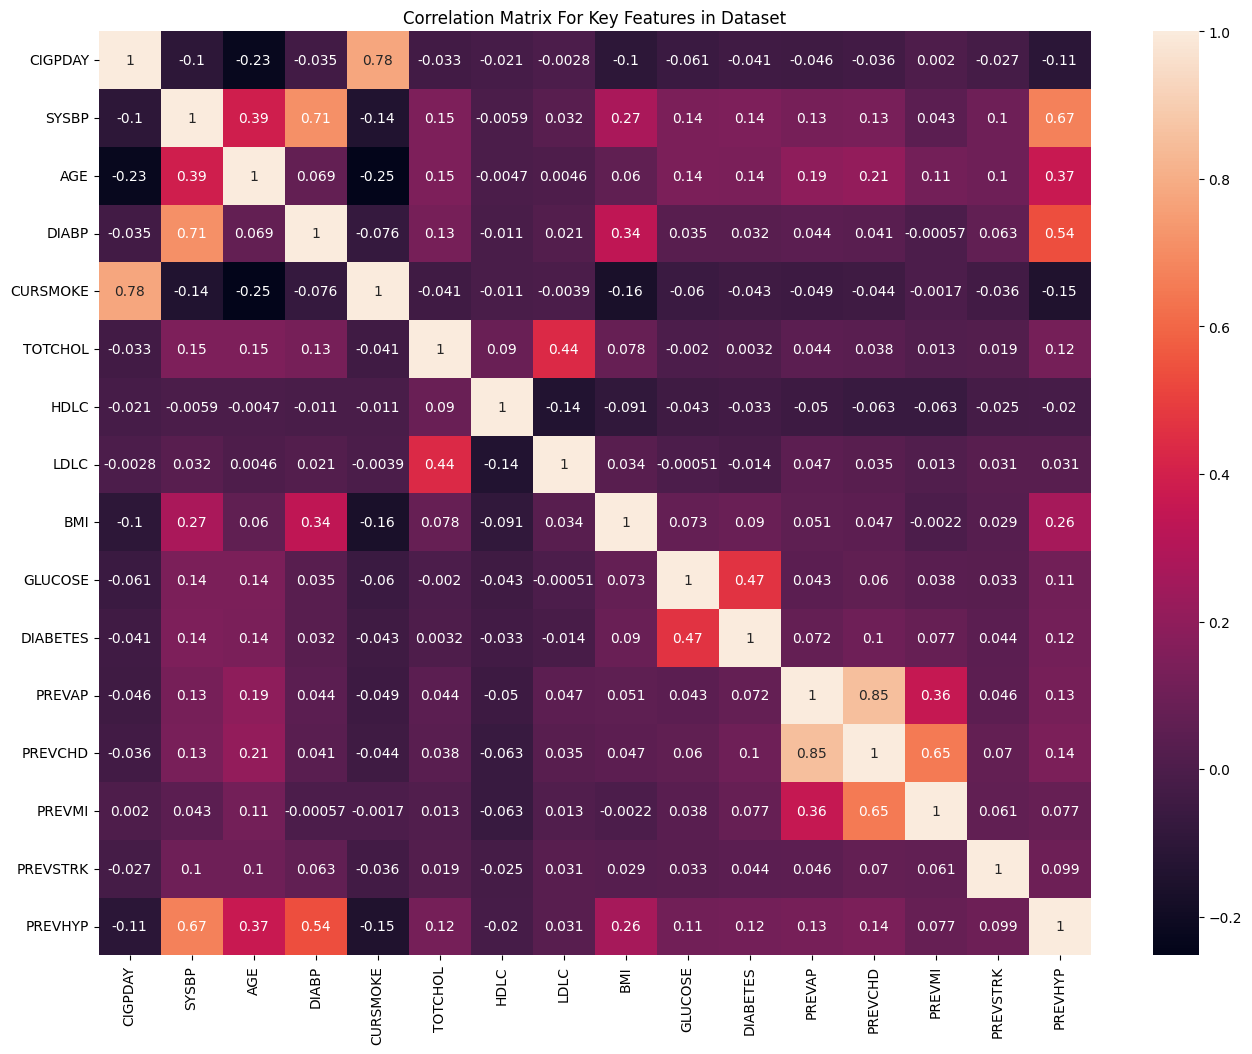

<Figure size 640x480 with 0 Axes>

In [31]:
# Filter the required columns
df_comp = df[['CIGPDAY', 'SYSBP', 'AGE','DIABP','CURSMOKE','TOTCHOL','HDLC','LDLC','BMI', 'GLUCOSE','DIABETES','PREVAP','PREVCHD', 'PREVMI','PREVSTRK', 'PREVHYP']]

# Remove rows with missing values
df_comp = df_comp.dropna()

# Calculate the correlation matrix
correlation_matrix = df_comp[['CIGPDAY', 'SYSBP', 'AGE','DIABP','CURSMOKE','TOTCHOL','HDLC','LDLC','BMI', 'GLUCOSE','DIABETES','PREVAP','PREVCHD', 'PREVMI','PREVSTRK', 'PREVHYP']].corr()

# Display the correlation matrix
print(correlation_matrix)
# Create a heatmap-style correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="rocket")
plt.title("Correlation Matrix For Key Features in Dataset")
plt.show()
plt.savefig("correlation_heatmap.png")

           CIGPDAY     SYSBP       AGE     DIABP  CURSMOKE   TOTCHOL   
CIGPDAY   1.000000 -0.102277 -0.226817 -0.035116  0.778115 -0.032780  \
SYSBP    -0.102277  1.000000  0.389010  0.711641 -0.140761  0.146647   
AGE      -0.226817  0.389010  1.000000  0.069258 -0.252655  0.146633   
DIABP    -0.035116  0.711641  0.069258  1.000000 -0.075925  0.127397   
CURSMOKE  0.778115 -0.140761 -0.252655 -0.075925  1.000000 -0.040941   
TOTCHOL  -0.032780  0.146647  0.146633  0.127397 -0.040941  1.000000   
HDLC     -0.021278 -0.005914 -0.004744 -0.010831 -0.011421  0.089846   
LDLC     -0.002828  0.032140  0.004630  0.020640 -0.003924  0.436349   
BMI      -0.102205  0.274063  0.060064  0.336656 -0.164884  0.077977   
GLUCOSE  -0.060634  0.142457  0.141612  0.035420 -0.060385 -0.001955   
DIABETES -0.040579  0.144683  0.137484  0.031810 -0.043479  0.003206   

              HDLC      LDLC       BMI   GLUCOSE  DIABETES  
CIGPDAY  -0.021278 -0.002828 -0.102205 -0.060634 -0.040579  
SYSBP    -0.0

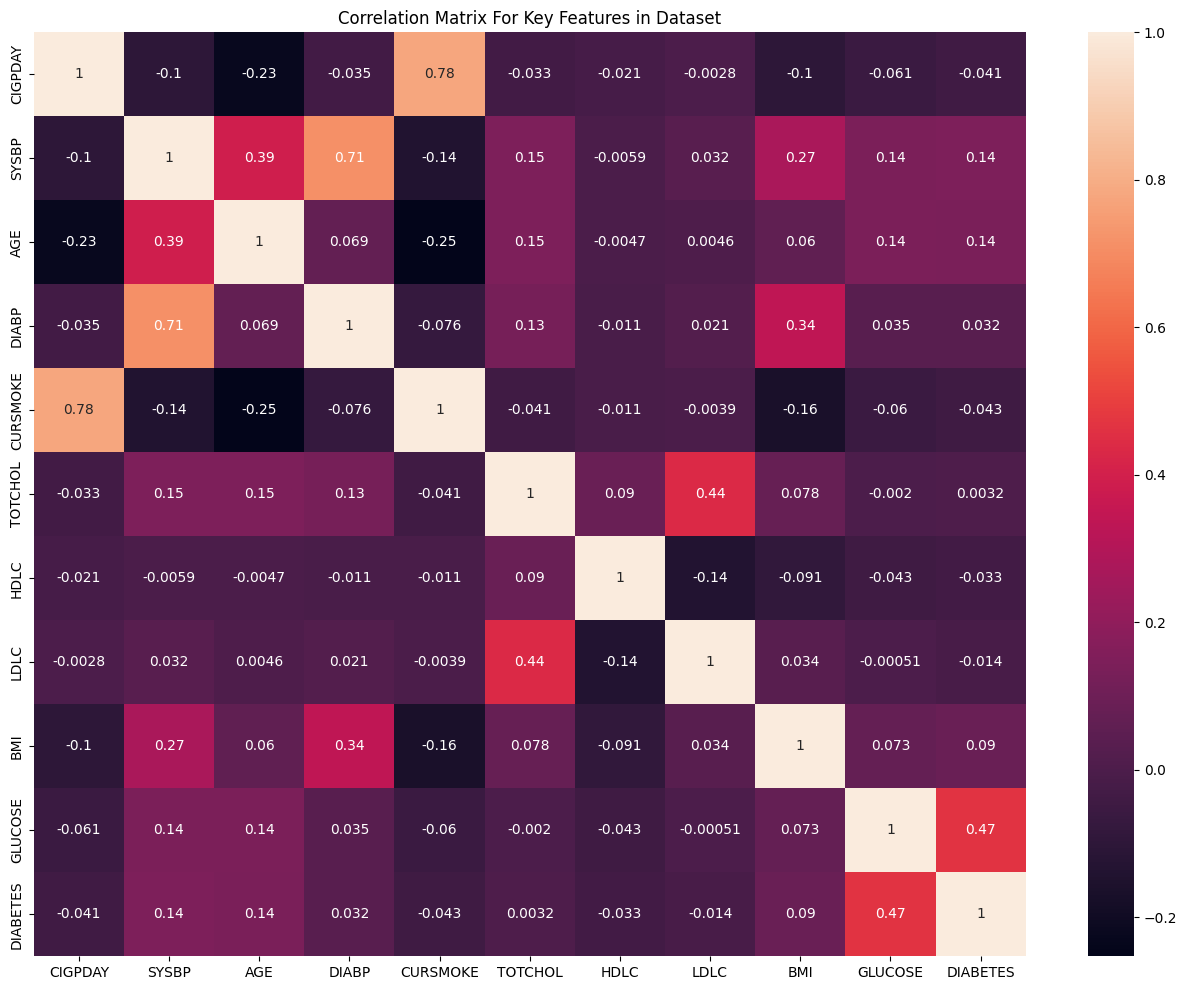

<Figure size 640x480 with 0 Axes>

In [32]:
# Filter the required columns
df_comp = df[['CIGPDAY', 'SYSBP', 'AGE','DIABP','CURSMOKE','TOTCHOL','HDLC','LDLC','BMI', 'GLUCOSE','DIABETES']]

# Remove rows with missing values
df_comp = df_comp.dropna()

# Calculate the correlation matrix
correlation_matrix = df_comp[['CIGPDAY', 'SYSBP', 'AGE','DIABP','CURSMOKE','TOTCHOL','HDLC','LDLC','BMI', 'GLUCOSE','DIABETES']].corr()

# Display the correlation matrix
print(correlation_matrix)
# Create a heatmap-style correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="rocket")
plt.title("Correlation Matrix For Key Features in Dataset")
plt.show()
plt.savefig("correlation_heatmap.png")

---

# Application of Modelling

## Classification via Decision Tree Classification Model

In [ ]:
df_fil.head()
cat_vars= ['SEX']
df_fil = pd.get_dummies(df_fil, columns = cat_vars)

In [ ]:
# Split the data into features (X) and target variable (y)
X = df_fil.drop('DIABETES', axis=1)
y = df_fil['DIABETES']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


# Create a Random Forest classifier
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)


In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)


---

In [ ]:
# Split the data into features (X) and target variable (y)
X_chd = df_fil.drop('PREVCHD', axis=1)
Y_chd = df_fil['PREVCHD']

# Split the data into training and testing sets
X_train_chd, X_test_chd, y_train_chd, y_test_chd = train_test_split(X_chd, Y_chd, test_size=0.2, random_state=42)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


# Create a Random Forest classifier
rf_model_chd = RandomForestClassifier()

# Train the model
rf_model_chd.fit(X_train_chd, y_train_chd)

In [ ]:
# Make predictions on the test set
y_pred_chd = rf_model_chd.predict(X_test_chd)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_chd, y_pred_chd)
print('Accuracy:', accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test_chd, y_pred_chd)
print('Confusion Matrix:')
print(cm)

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Define base classifiers
rf_classifier = RandomForestClassifier()
svm_classifier = SVC(probability=True)
lr_classifier = LogisticRegression()

# Create a list of tuples for the base classifiers
base_classifiers = [('Random Forest', rf_classifier), ('SVM', svm_classifier), ('Naive Bayes', nb_classifier), ('Logistic Regression', lr_classifier)]


In [ ]:
# Define base classifiers
rf_classifier = RandomForestClassifier()
svm_classifier = SVC(probability=True)
lr_classifier = LogisticRegression()
nb_classifier = GaussianNB()

# Create a list of tuples for the base classifiers
base_classifiers = [('Random Forest', rf_classifier), ('SVM', svm_classifier),('Naive Bayes', nb_classifier), ('Logistic Regression', lr_classifier)]

# Iterate over base classifiers
for name, classifier in base_classifiers:
    # Train the classifier
    classifier.fit(X_train_chd, y_train_chd)
    
    # Make predictions on the test set
    y_pred_chd = classifier.predict(X_test_chd)
    
    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(y_test_chd, y_pred_chd)
    
    # Create a confusion matrix
    cm = confusion_matrix(y_test_chd, y_pred_chd)
    report = classification_report(y_test_chd, y_pred_chd)
    
    # Print the evaluation metrics
    print('Classifier:', name)
    print('Accuracy:', accuracy)
    print('Confusion Matrix:')
    print(cm)
    print('Evaluation Report:')
    print(report)
    print("----------------NEXT MODEL---------------")


In [ ]:
# Define meta classifier
meta_classifier = LogisticRegression()

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)


In [ ]:
# Train the stacking classifier
stacking_classifier.fit(X_train_chd, y_train_chd)


In [ ]:
# Make predictions on the test set
y_pred_chd = stacking_classifier.predict(X_test_chd)


In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_chd, y_pred_chd)
print('Accuracy:', accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test_chd, y_pred_chd)
print('Confusion Matrix:')
print(cm)
report = classification_report(y_test_chd, y_pred_chd)
print(report)

---
# Classification with User Input Collection

In [ ]:
data = pd.read_csv("frmgham2.csv")

# Select the columns used for user input
selected_columns = ['SEX', 'AGE', 'SYSBP', 'BMI', 'GLUCOSE', 'HDLC', 'DIABETES', 'PREVAP', 'PREVSTRK', 'PREVHYP', 'PREVCHD']
data = data[selected_columns]

# Remove rows with missing values
data = data.dropna()

# Split the data into features (X) and target variable (y)
X_chd = data.drop('PREVCHD', axis=1)
Y_chd = data['PREVCHD']

data.head()

In [ ]:
# Split the data into training and testing sets
X_train_chd, X_test_chd, y_train_chd, y_test_chd = train_test_split(X_chd, Y_chd, test_size=0.2, random_state=42)
# Train the stacking classifier
stacking_classifier.fit(X_train_chd, y_train_chd)
# Make predictions on the test set
y_pred_chd2 = stacking_classifier.predict(X_test_chd)



In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_chd, y_pred_chd2)
print('Accuracy:', accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test_chd, y_pred_chd2)
print('Confusion Matrix:')
print(cm)
report = classification_report(y_test_chd, y_pred_chd2)
print(report)

In [ ]:
# Take user input for the features
sex = int(input("Enter SEX (0 for female, 1 for male): "))
age = int(input("Enter AGE: "))
sysbp = float(input("Enter SYSBP: "))
bmi = float(input("Enter BMI: "))
glucose = float(input("Enter GLUCOSE: "))
hdlc = float(input("Enter HDLC: "))
diabetes = int(input("Enter DIABETES (0 for No, 1 for Yes): "))
prevap = int(input("Enter PREVAP (0 for No, 1 for Yes): "))
prestrk = int(input("Enter PRESTRK (0 for No, 1 for Yes): "))
prehyp = int(input("Enter PREHYP (0 for No, 1 for Yes): "))

# Prepare input data
input_data = pd.DataFrame({'SEX': [sex],
                           'AGE': [age],
                           'SYSBP': [sysbp],
                           'BMI': [bmi],
                           'GLUCOSE': [glucose],
                           'HDLC': [hdlc],
                           'DIABETES': [diabetes],
                           'PREVAP': [prevap],
                           'PRESTRK': [prevstrk],
                           'PREHYP': [prevhyp]})
